In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import io
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_pickle('waferImg26x26.pkl')
images = np.array(df.images.tolist())
labels = df.labels.values
labels = np.asarray([str(l[0]) for l in labels])

In [4]:
print(np.unique(labels))

['Center' 'Donut' 'Edge-Loc' 'Edge-Ring' 'Loc' 'Near-full' 'Random'
 'Scratch' 'none']


In [5]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

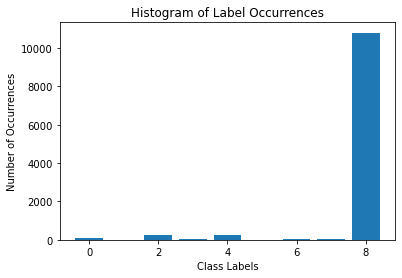

In [37]:
unique_labels, counts = np.unique(y_train, return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Class Labels')
plt.ylabel('Number of Occurrences')
plt.title('Histogram of Label Occurrences')
plt.show()

In [38]:
for label, count in zip(unique_labels, counts):
    print(f'Label {label}: {count} occurrences')

Label 0: 73 occurrences
Label 1: 1 occurrences
Label 2: 234 occurrences
Label 3: 21 occurrences
Label 4: 246 occurrences
Label 5: 11 occurrences
Label 6: 58 occurrences
Label 7: 56 occurrences
Label 8: 10792 occurrences


### Remark
Looking at the distribution of our classes among the dataset, we can see a highly unbalanced dataset which might bring some problems with it for predicting classes of unknoiwn wafer images

(3, 26, 26)


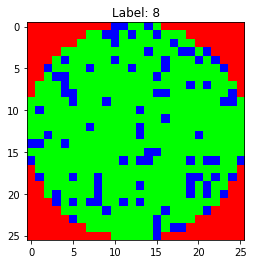

(3, 26, 26)


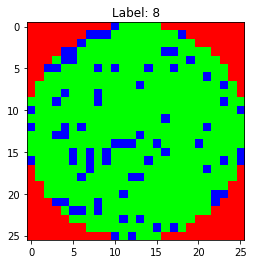

(3, 26, 26)


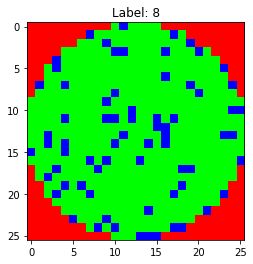

(3, 26, 26)


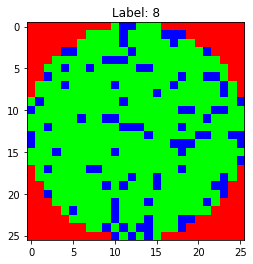

(3, 26, 26)


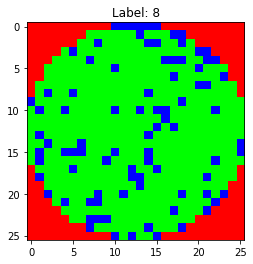

In [39]:
num_images_to_plot = 5
for i in range(num_images_to_plot):
    image_array = images[i]
    label = labels[i]
    print(image_array.shape)
    # Transpose the image array if it's in the shape (3, 26, 26) to (26, 26, 3)
    if image_array.shape[0] == 3:
        image_array = image_array.transpose(1, 2, 0)

    plt.imshow(image_array)
    plt.title(f'Label: {label}')
    plt.show()

### Use of CNN

In [40]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [41]:
print(X_train.shape)
print(X_test.shape)
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_test = np.transpose(X_test, (0, 2, 3, 1))

print(X_train.shape)
print(X_test.shape)

(11492, 3, 26, 26)
(2874, 3, 26, 26)
(11492, 26, 26, 3)
(2874, 26, 26, 3)


In [42]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(26, 26, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [43]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))  # Assuming 10 classes, adjust as needed


In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
360/360 [==============================] - 7s 20ms/step - loss: 0.4040 - accuracy: 0.9364 - val_loss: 0.3388 - val_accuracy: 0.9384
Epoch 2/10
360/360 [==============================] - 7s 20ms/step - loss: 0.3164 - accuracy: 0.9391 - val_loss: 0.3616 - val_accuracy: 0.9384
Epoch 3/10
360/360 [==============================] - 7s 20ms/step - loss: 0.2931 - accuracy: 0.9391 - val_loss: 0.2754 - val_accuracy: 0.9384
Epoch 4/10
360/360 [==============================] - 7s 20ms/step - loss: 0.2785 - accuracy: 0.9400 - val_loss: 0.2661 - val_accuracy: 0.9422
Epoch 5/10
360/360 [==============================] - 7s 20ms/step - loss: 0.2670 - accuracy: 0.9427 - val_loss: 0.2844 - val_accuracy: 0.9422
Epoch 6/10
360/360 [==============================] - 7s 18ms/step - loss: 0.2595 - accuracy: 0.9432 - val_loss: 0.2517 - val_accuracy: 0.9457
Epoch 7/10
360/360 [==============================] - 7s 19ms/step - loss: 0.2464 - accuracy: 0.9451 - val_loss: 0.2542 - val_accuracy: 0.9457

In [46]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

90/90 - 1s - loss: 0.2140 - accuracy: 0.9478

Test accuracy: 0.9478079080581665


Accuracy for class 0: 0.058823529411764705
Accuracy for class 1: 0.06451612903225806
Accuracy for class 2: 0.0
Accuracy for class 3: 0.13725490196078433
Accuracy for class 4: 0.0
Accuracy for class 5: 0.9375
Accuracy for class 6: 0.0
Accuracy for class 7: 1.0


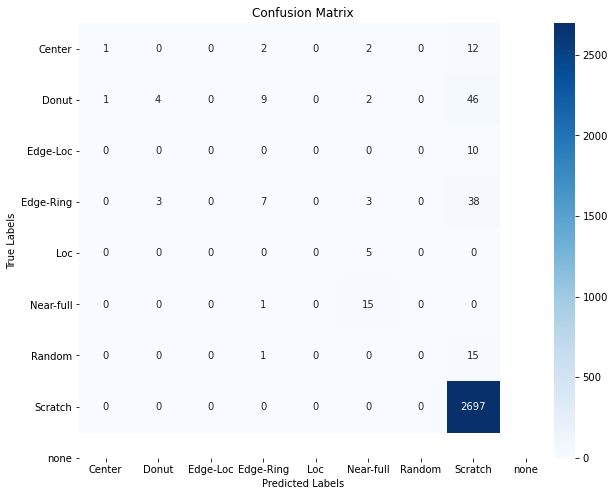

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Evaluate the model on the test set
# Transpose the test data to have the channel axis as the last dimension

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Calculate accuracy for each class
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Print accuracy for each class
for i, acc in enumerate(class_accuracy):
    print(f'Accuracy for class {i}: {acc}')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [83]:
unique_labels_test = np.unique(y_test)
unique_labels_pred = np.unique(y_pred_classes)

print("Unique labels in ground truth:", unique_labels_test)
print("Unique labels in predicted labels:", unique_labels_pred)

Unique labels in ground truth: [0 2 3 4 5 6 7 8]
Unique labels in predicted labels: [2 4 5 6 8]


### Conclusion
What we can see from the confusion matrix is that the predictions made were only accurate for the class Scratch. While some classes can not get well predicted such as 0, 1, 2, 6. This is because of the highly unbalanced dataset which we could saw at the beginning. Therefore we will apply data augmentation to the minority classes to receive a better balanced dataset, so we can create a more generalized model to predict the class of wafers.
1. Augmentation approach with ImageDataGenerator Object 
2. Augmentation approach with Encoder/Decoder NN

### Use of Data Augmentation - ImageDataGenerator

In [171]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def augment_minority_classes(X, y, target_count_per_class=1000):
    while True:
        # Identify minority classes
        minority_classes = [class_label for class_label in np.unique(y) if np.sum(y == class_label) < target_count_per_class]

        if not minority_classes:
            break  # Exit the loop if all classes reach the target count

        # Apply data augmentation only to minority class samples
        for minority_class_label in minority_classes:
            print(minority_class_label)
            # Indices of samples belonging to the minority class
            minority_indices = np.where(y == minority_class_label)[0]

            # Create a new ImageDataGenerator for each iteration with random augmentations
            datagen_minority = ImageDataGenerator(
                rotation_range=np.random.uniform(0, 20),
                horizontal_flip=np.random.choice([True, False]),
                vertical_flip=np.random.choice([True, False]),
                fill_mode='nearest'
            )

            # Data augmentation
            for index in minority_indices:
                image = X[index]
                image = image.reshape((1,) + image.shape)  # Add batch dimension
                datagen_minority.fit(image)
                augmented_images = datagen_minority.flow(image, batch_size=1)

                # Append augmented images to the training set
                X = np.vstack((X, augmented_images.next()))
                y = np.append(y, minority_class_label)

    return X, y



In [172]:
# Example usage:
df = pd.read_pickle('waferImg26x26.pkl')
augm1_images = np.array(df.images.tolist())
augm1_images = augm1_images.transpose(0, 3,2,1)
print(augm1_images.shape)
augm1_labels = df.labels.values
augm1_labels = np.asarray([str(l[0]) for l in augm1_labels])
augm1_images, augm_1labels = augment_minority_classes(augm1_images, augm1_labels)

(14366, 26, 26, 3)
Center
Donut
Edge-Loc
Edge-Ring
Loc
Near-full
Random
Scratch
Center
Donut
Edge-Loc
Edge-Ring
Loc
Near-full
Random
Scratch
Center
Donut
Edge-Ring
Near-full
Random
Scratch
Center
Donut
Edge-Ring
Near-full
Random
Scratch
Donut
Edge-Ring
Near-full
Donut
Edge-Ring
Near-full
Donut
Donut
Donut
Donut


In [174]:
# Assuming y_train is your array of labels
unique_labels, label_counts = np.unique(augm_1labels, return_counts=True)

# Display the number of occurrences per label
for label, count in zip(unique_labels, label_counts):
    print(f"Label {label}: {count} occurrences")

Label Center: 1440 occurrences
Label Donut: 1024 occurrences
Label Edge-Loc: 1184 occurrences
Label Edge-Ring: 1984 occurrences
Label Loc: 1188 occurrences
Label Near-full: 1024 occurrences
Label Random: 1184 occurrences
Label Scratch: 1152 occurrences
Label none: 13489 occurrences


In [179]:
# Specify the desired number of images per class
target_images_per_class = 1000

# Initialize new lists to store filtered images and labels
filtered_images = []
filtered_labels = []

# Iterate over unique labels
for label in np.unique(augm_1labels):
    # Identify indices of images belonging to the current class
    indices_for_class = np.where(augm_1labels == label)[0]

    # Randomly select images to keep if there are more than the target number
    if len(indices_for_class) > target_images_per_class:
        indices_to_keep = np.random.choice(indices_for_class, size=target_images_per_class, replace=False)
    else:
        indices_to_keep = indices_for_class

    # Append the selected images and labels to the filtered lists
    filtered_images.extend(augm1_images[indices_to_keep])
    filtered_labels.extend(augm_1labels[indices_to_keep])

# Convert the filtered lists to NumPy arrays
X_augm1_filtered = np.array(filtered_images)
y_augm1_filtered = np.array(filtered_labels)


In [180]:
label_encoder = LabelEncoder()
y_augm1_filtered = label_encoder.fit_transform(y_augm1_filtered)

In [181]:
# Assuming y_train is your array of labels
unique_labels_augm1, label_counts_augm1 = np.unique(y_augm1_filtered, return_counts=True)

# Display the number of occurrences per label
for label, count in zip(unique_labels_augm1, label_counts_augm1):
    print(f"Label {label}: {count} occurrences")

Label 0: 1000 occurrences
Label 1: 1000 occurrences
Label 2: 1000 occurrences
Label 3: 1000 occurrences
Label 4: 1000 occurrences
Label 5: 1000 occurrences
Label 6: 1000 occurrences
Label 7: 1000 occurrences
Label 8: 1000 occurrences


In [184]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
#also validation
# Split the data into training and test sets
X_train_augm1, X_test_augm1, y_train_augm1, y_test_augm1 = train_test_split(X_augm1_filtered, y_augm1_filtered, test_size=0.2, random_state=42, stratify=y_augm1_filtered)

# Further split the training set into training and validation sets
X_train_augm1, X_val_augm1, y_train_augm1, y_val_augm1 = train_test_split(X_train_augm1, y_train_augm1, test_size=0.25, random_state=42, stratify=y_train_augm1)
# Here, test_size=0.25 means that the validation set will be 25% of the original training set

# Normalize pixel values to be between 0 and 1
X_train_augm1 = X_train_augm1 / 255.0
X_val_augm1 = X_val_augm1 / 255.0
X_test_augm1 = X_test_augm1 / 255.0

In [200]:
X_test = np.transpose(X_test, (0,2,3,1))

print(y_train.shape)


(7200,)


In [185]:
# Define the CNN model
model_augm1 = models.Sequential()
model_augm1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(26, 26, 3)))
model_augm1.add(layers.MaxPooling2D((2, 2)))
model_augm1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_augm1.add(layers.MaxPooling2D((2, 2)))
model_augm1.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [186]:
model_augm1.add(layers.Flatten())
model_augm1.add(layers.Dense(64, activation='relu'))
model_augm1.add(layers.Dense(9, activation='softmax'))

In [187]:
model_augm1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [189]:
model_augm1.fit(X_train_augm1, y_train_augm1, epochs=100, validation_data=(X_val_augm1, y_val_augm1))

Epoch 1/100
169/169 [==============================] - 4s 23ms/step - loss: 0.6797 - accuracy: 0.7387 - val_loss: 0.6476 - val_accuracy: 0.7522
Epoch 2/100
169/169 [==============================] - 3s 20ms/step - loss: 0.6561 - accuracy: 0.7498 - val_loss: 0.6315 - val_accuracy: 0.7739
Epoch 3/100
169/169 [==============================] - 3s 19ms/step - loss: 0.6261 - accuracy: 0.7674 - val_loss: 0.6102 - val_accuracy: 0.7861
Epoch 4/100
169/169 [==============================] - 3s 19ms/step - loss: 0.5938 - accuracy: 0.7724 - val_loss: 0.5667 - val_accuracy: 0.7972
Epoch 5/100
169/169 [==============================] - 3s 21ms/step - loss: 0.5846 - accuracy: 0.7811 - val_loss: 0.6806 - val_accuracy: 0.7739
Epoch 6/100
169/169 [==============================] - 3s 19ms/step - loss: 0.5468 - accuracy: 0.8000 - val_loss: 0.5144 - val_accuracy: 0.8039
Epoch 7/100
169/169 [==============================] - 3s 17ms/step - loss: 0.5305 - accuracy: 0.8013 - val_loss: 0.5063 - val_accuracy:

169/169 [==============================] - 3s 20ms/step - loss: 0.2062 - accuracy: 0.9250 - val_loss: 0.2789 - val_accuracy: 0.9000
Epoch 58/100
169/169 [==============================] - 3s 20ms/step - loss: 0.1748 - accuracy: 0.9359 - val_loss: 0.2324 - val_accuracy: 0.9128
Epoch 59/100
169/169 [==============================] - 3s 20ms/step - loss: 0.1935 - accuracy: 0.9339 - val_loss: 0.2373 - val_accuracy: 0.9172
Epoch 60/100
169/169 [==============================] - 3s 20ms/step - loss: 0.1743 - accuracy: 0.9406 - val_loss: 0.2363 - val_accuracy: 0.9122
Epoch 61/100
169/169 [==============================] - 3s 20ms/step - loss: 0.1864 - accuracy: 0.9369 - val_loss: 0.2410 - val_accuracy: 0.9133
Epoch 62/100
169/169 [==============================] - 3s 19ms/step - loss: 0.1700 - accuracy: 0.9369 - val_loss: 0.2385 - val_accuracy: 0.9111
Epoch 63/100
169/169 [==============================] - 3s 20ms/step - loss: 0.1688 - accuracy: 0.9413 - val_loss: 0.2657 - val_accuracy: 0.905

Accuracy for class 0: 0.765
Accuracy for class 1: 0.99
Accuracy for class 2: 0.62
Accuracy for class 3: 0.18
Accuracy for class 4: 0.75
Accuracy for class 5: 0.9
Accuracy for class 6: 0.8
Accuracy for class 7: 0.385
Accuracy for class 8: 0.94


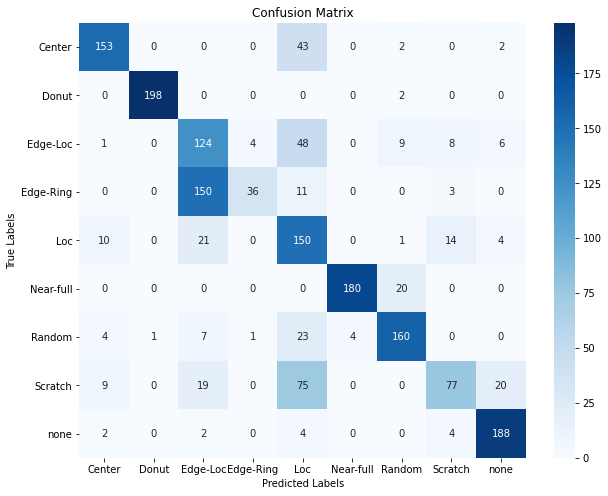

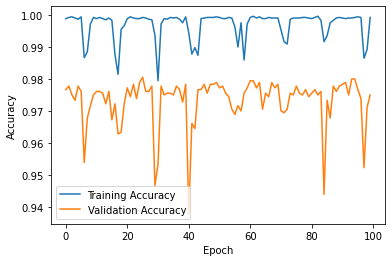

In [190]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_augm1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_augm1, y_pred_classes)

# Calculate accuracy for each class
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Print accuracy for each class
for i, acc in enumerate(class_accuracy):
    print(f'Accuracy for class {i}: {acc}')

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Use of Data Augmentation - Encoder/Decoder

In [89]:
#reload data for this try
df_augm2 = pd.read_pickle('waferImg26x26.pkl')
augm2_images = np.array(df_augm2.images.tolist())
augm2_labels = df_augm2.labels.values
labels = np.asarray([str(l[0]) for l in augm2_labels])

In [90]:
augm2_images.shape

(14366, 3, 26, 26)

(14366, 26, 26, 3)
(26, 26, 3)


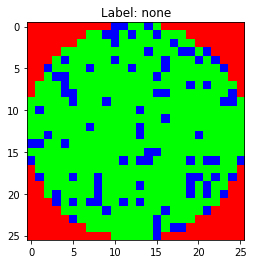

(26, 26, 3)


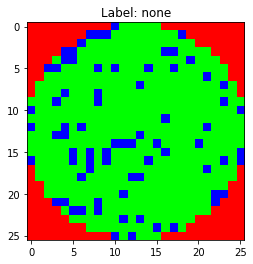

(26, 26, 3)


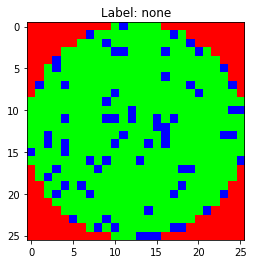

(26, 26, 3)


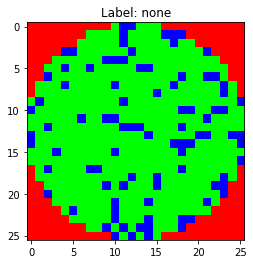

(26, 26, 3)


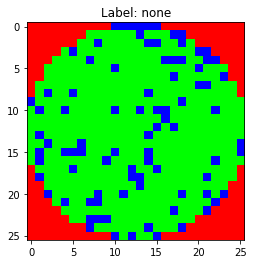

In [91]:
# Assuming augm2_images is of shape (14366, 3, 26, 26)
X_train_augm2 = np.transpose(augm2_images, (0, 2, 3, 1))

# Now, X_train_augm2 has the shape (14366, 26, 26, 3)
print(X_train_augm2.shape)

# The rest of your code remains unchanged

num_images_to_plot = 5
for i in range(num_images_to_plot):
    image_array = X_train_augm2[i]  # Extracting the ith image
    label = labels[i]
    print(image_array.shape)

    # Plot the image
    plt.imshow(image_array)
    plt.title(f'Label: {label}')
    plt.show()

In [50]:
def process_labels(data):

    unique_labels = np.unique(data)
    subset_labels = [label for label in unique_labels if label != 'none']

    return unique_labels, subset_labels


In [51]:
all_unique_labels, subset_labels = process_labels(augm2_labels)

print("All Unique Labels:", all_unique_labels)
print("Subset Labels (excluding 'none'):", subset_labels)

All Unique Labels: [array(['Center'], dtype='<U9') array(['Donut'], dtype='<U9')
 array(['Edge-Loc'], dtype='<U9') array(['Edge-Ring'], dtype='<U9')
 array(['Loc'], dtype='<U9') array(['Near-full'], dtype='<U9')
 array(['Random'], dtype='<U9') array(['Scratch'], dtype='<U9')
 array(['none'], dtype='<U9')]
Subset Labels (excluding 'none'): [array(['Center'], dtype='<U9'), array(['Donut'], dtype='<U9'), array(['Edge-Loc'], dtype='<U9'), array(['Edge-Ring'], dtype='<U9'), array(['Loc'], dtype='<U9'), array(['Near-full'], dtype='<U9'), array(['Random'], dtype='<U9'), array(['Scratch'], dtype='<U9')]


In [53]:
# Print the number of occurrences for each unique label excluding 'none'
total_occurrences = 0
for label, count in zip(unique_labels, counts):
    print(f'Label {label}: {count} occurrences')
    total_occurrences += count

# Print the total occurrences excluding 'none'
print(f'Total occurrences: {total_occurrences}')

Label Center: 90 occurrences
Label Donut: 1 occurrences
Label Edge-Loc: 296 occurrences
Label Edge-Ring: 31 occurrences
Label Loc: 297 occurrences
Label Near-full: 16 occurrences
Label Random: 74 occurrences
Label Scratch: 72 occurrences
Label none: 13489 occurrences
Total occurrences: 14366


(3, 26, 26)


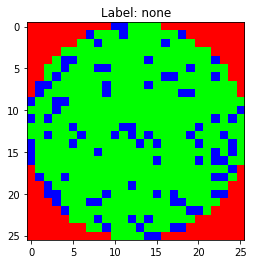

In [54]:

    image_array = augm2_images[12345]  # Assuming 'images' contains NumPy arrays
    label = labels[12345]
    print(image_array.shape)
    # Transpose the image array if it's in the shape (3, 26, 26) to (26, 26, 3)
    if image_array.shape[0] == 3:
        image_array = image_array.transpose(1, 2, 0)

    # Plot the image
    plt.imshow(image_array)
    plt.title(f'Label: {label}')
    plt.show()

In [92]:
augm2_images.shape

(14366, 3, 26, 26)

In [93]:
X_train_augm2 = np.transpose(augm2_images, (0, 2, 3, 1))
X_train_augm2.shape

(14366, 26, 26, 3)

In [70]:
import tensorflow as tf
from tensorflow.keras import layers, Input, models
# parameter
epoch=15
batch_size=1024

# Encoder
input_shape = (26, 26, 3)
input_tensor = Input(input_shape)
encode = layers.Conv2D(64, (3,3), padding='same', activation='relu')(input_tensor)

latent_vector = layers.MaxPool2D()(encode)

# Decoder
decode_layer_1 = layers.Conv2DTranspose(64, (3,3), padding='same', activation='relu')
decode_layer_2 = layers.UpSampling2D()
output_tensor = layers.Conv2DTranspose(3, (3,3), padding='same', activation='sigmoid')

# connect decoder layers
decode = decode_layer_1(latent_vector)
decode = decode_layer_2(decode)

ae = models.Model(input_tensor, output_tensor(decode))
ae.compile(optimizer = 'Adam',loss = 'mse')


In [71]:
# start train
# parameter
epoch=15
batch_size=1024

ae.fit(X_train_augm2, X_train_augm2, batch_size=batch_size,epochs=epoch)

Epoch 1/15
15/15 [==============================] - 13s 891ms/step - loss: 0.1558
Epoch 2/15
15/15 [==============================] - 13s 883ms/step - loss: 0.0957
Epoch 3/15
15/15 [==============================] - 13s 889ms/step - loss: 0.0808
Epoch 4/15
15/15 [==============================] - 13s 890ms/step - loss: 0.0707
Epoch 5/15
15/15 [==============================] - 13s 886ms/step - loss: 0.0629
Epoch 6/15
15/15 [==============================] - 13s 891ms/step - loss: 0.0564
Epoch 7/15
15/15 [==============================] - 14s 901ms/step - loss: 0.0512
Epoch 8/15
15/15 [==============================] - 14s 904ms/step - loss: 0.0469
Epoch 9/15
15/15 [==============================] - 14s 934ms/step - loss: 0.0426
Epoch 10/15
15/15 [==============================] - 16s 1s/step - loss: 0.0381
Epoch 11/15
15/15 [==============================] - 16s 1s/step - loss: 0.0339
Epoch 12/15
15/15 [==============================] - 18s 1s/step - loss: 0.0301
Epoch 13/15
15/15 [===

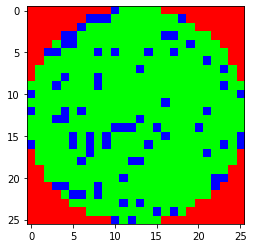

In [72]:
plt.imshow(X_train_augm2[1])

In [73]:
encoder = models.Model(input_tensor, latent_vector)

decoder_input = Input((13, 13, 64))
decode = decode_layer_1(decoder_input)
decode = decode_layer_2(decode)

decoder = models.Model(decoder_input, output_tensor(decode))

encoded_x = encoder.predict(X_train_augm2)

# Add noise
noised_encoded_x = encoded_x + np.random.normal(loc=0, scale=0.1, size = (len(encoded_x), 13, 13, 64))

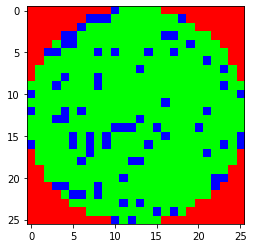

In [77]:
plt.imshow(X_train_augm2[1])

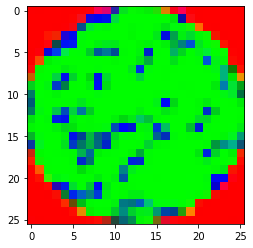

In [79]:
noised_gen_x = decoder.predict(noised_encoded_x)
plt.imshow(noised_gen_x[1])

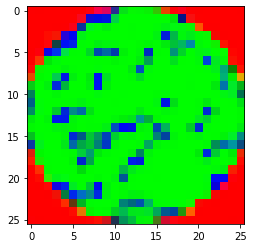

In [80]:
gen_x = ae.predict(X_train_augm2)
plt.imshow(gen_x[1])

In [145]:
def generate_and_combine_noised_images(encoder, decoder, input_data, labels, target_total=1000):
    unique_labels, label_counts = np.unique(labels, return_counts=True)
    print(label_counts)
    noised_images = []
    noised_labels = []

    for current_label, count in zip(unique_labels, label_counts):
        target_count = max(0, target_total - count)
        label_indices = np.where(labels == current_label)[0]

        for i in range(target_count):
            index_to_duplicate = label_indices[i % count]

            # Encode input wafer
            encoded_x = encoder.predict(input_data[index_to_duplicate:index_to_duplicate+1])

            # Add noise to encoded latent wafer vector
            noised_encoded_x = encoded_x + np.random.normal(loc=0, scale=0.1, size=(1, 13, 13, 64))

            # Decode the noised latent vector
            noised_gen_x = decoder.predict(noised_encoded_x)

            # Append to the list of noised images and labels
            noised_images.append(noised_gen_x)
            noised_labels.append(current_label)

    # Convert lists to numpy arrays
    noised_images = np.vstack(noised_images)
    noised_labels = np.array(noised_labels).reshape(-1, 1)  # Reshape to (n_samples, 1)

    # Combine the noised images with the original images
    combined_images = np.vstack([input_data, noised_images])
    combined_labels = np.concatenate([labels.reshape(-1, 1), noised_labels])

    return combined_images, combined_labels




In [146]:
# Example usage:
# Assuming X_train_augm2 is your input data, labels is your corresponding labels,
# encoder is your encoder model, and decoder is your decoder model
combined_images, combined_labels = generate_and_combine_noised_images(encoder, decoder, X_train_augm2, augm2_labels)

# Check the shape of the resulting combined images and labels
print(combined_images.shape)
print(combined_labels.shape)

[   90     1   296    31   297    16    74    72 13489]
(21489, 26, 26, 3)
(21489, 1)


In [147]:
#shrink class 'none' to also only 1000 images
# Specify the desired number of images per class
target_images_per_class = 1000

# Initialize new lists to store filtered images and labels
filtered_images = []
filtered_labels = []

# Iterate over unique labels
for label in np.unique(combined_labels):
    # Identify indices of images belonging to the current class
    indices_for_class = np.where(combined_labels == label)[0]

    # Randomly select images to keep if there are more than the target number
    if len(indices_for_class) > target_images_per_class:
        indices_to_keep = np.random.choice(indices_for_class, size=target_images_per_class, replace=False)
    else:
        indices_to_keep = indices_for_class

    # Append the selected images and labels to the filtered lists
    filtered_images.extend(combined_images[indices_to_keep])
    filtered_labels.extend(combined_labels[indices_to_keep])

# Convert the filtered lists to NumPy arrays
X_filtered = np.array(filtered_images)
y_filtered = np.array(filtered_labels)



In [151]:
y_filtered = np.array([label[0] if isinstance(label, np.ndarray) else label for label in y_filtered.ravel()])

In [152]:
# Convert string labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y_filtered = label_encoder.fit_transform(y_filtered)

In [153]:
# Assuming y_train is your array of labels
unique_labels, label_counts = np.unique(y_filtered, return_counts=True)

# Display the number of occurrences per label
for label, count in zip(unique_labels, label_counts):
    print(f"Label {label}: {count} occurrences")

Label 0: 1000 occurrences
Label 1: 1000 occurrences
Label 2: 1000 occurrences
Label 3: 1000 occurrences
Label 4: 1000 occurrences
Label 5: 1000 occurrences
Label 6: 1000 occurrences
Label 7: 1000 occurrences
Label 8: 1000 occurrences


In [155]:
#also validation
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)
# Here, test_size=0.25 means that the validation set will be 25% of the original training set

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [156]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(26, 26, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [157]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))

In [158]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [166]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
169/169 [==============================] - 3s 17ms/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.0932 - val_accuracy: 0.9767
Epoch 2/100
169/169 [==============================] - 3s 17ms/step - loss: 0.0053 - accuracy: 0.9993 - val_loss: 0.0909 - val_accuracy: 0.9778
Epoch 3/100
169/169 [==============================] - 3s 16ms/step - loss: 0.0046 - accuracy: 0.9994 - val_loss: 0.0916 - val_accuracy: 0.9750
Epoch 4/100
169/169 [==============================] - 3s 16ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.1018 - val_accuracy: 0.9733
Epoch 5/100
169/169 [==============================] - 3s 16ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.0899 - val_accuracy: 0.9778
Epoch 6/100
169/169 [==============================] - 3s 17ms/step - loss: 0.0046 - accuracy: 0.9994 - val_loss: 0.1030 - val_accuracy: 0.9761
Epoch 7/100
169/169 [==============================] - 3s 17ms/step - loss: 0.0475 - accuracy: 0.9867 - val_loss: 0.2204 - val_accuracy:

169/169 [==============================] - 3s 19ms/step - loss: 0.0294 - accuracy: 0.9900 - val_loss: 0.1333 - val_accuracy: 0.9717
Epoch 58/100
169/169 [==============================] - 3s 20ms/step - loss: 0.0084 - accuracy: 0.9976 - val_loss: 0.1230 - val_accuracy: 0.9700
Epoch 59/100
169/169 [==============================] - 3s 19ms/step - loss: 0.0635 - accuracy: 0.9859 - val_loss: 0.0949 - val_accuracy: 0.9756
Epoch 60/100
169/169 [==============================] - 3s 19ms/step - loss: 0.0093 - accuracy: 0.9972 - val_loss: 0.0922 - val_accuracy: 0.9772
Epoch 61/100
169/169 [==============================] - 3s 18ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0928 - val_accuracy: 0.9794
Epoch 62/100
169/169 [==============================] - 3s 18ms/step - loss: 0.0029 - accuracy: 0.9996 - val_loss: 0.0954 - val_accuracy: 0.9794
Epoch 63/100
169/169 [==============================] - 3s 20ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.1009 - val_accuracy: 0.977

(1800, 26, 26, 3)
Accuracy for class 0: 0.995
Accuracy for class 1: 1.0
Accuracy for class 2: 0.93
Accuracy for class 3: 1.0
Accuracy for class 4: 0.865
Accuracy for class 5: 1.0
Accuracy for class 6: 1.0
Accuracy for class 7: 0.97
Accuracy for class 8: 0.97


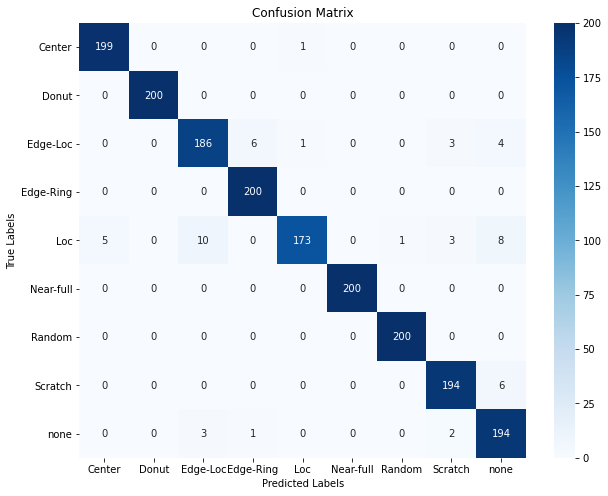

In [165]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
print(X_test.shape)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Calculate accuracy for each class
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Print accuracy for each class
for i, acc in enumerate(class_accuracy):
    print(f'Accuracy for class {i}: {acc}')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Conclusion 
By using any data augmentation technique, we were able to resolve way better general results than without. By trying out the two different approaches, we were able to see that the usage of an Encoder/decoder technique has more promising results. 
 - Could you propose strategies to improve the result and give an
estimate of how much you expect the results to improve?

Another variant to improve the accuracy would be to use pre-trained models and then only fine tune e.g the last layer. However, I was not able to find a pre-trained model on this dataset. 
In addition, instead of generating a lot own images to balance the dataset out, it would yield more promising results if the dataset would have been more balanced from the beginning. 